In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [14]:
def get_features_cat_regresssion(df, target_col, p_value=0.05):
    from scipy.stats import mannwhitneyu
    from scipy.stats import f_oneway
    lista_cat = []
    for col in df:
        values_no = df[col].nunique()
        if values_no == 2:
            value_1 = df[col].unique()[0]
            value_2 = df[col].unique()[1]
            group_a = df.loc[df[col] == value_1, target_col]
            group_b = df.loc[df[col] == value_2, target_col]
            _, p_val = mannwhitneyu(group_a, group_b)
            if p_val < p_value:
                lista_cat.append(col)
        elif 2 < values_no <= 10:
            groups = df[col].unique()
            target_values_x_group = [df.loc[df[col] == group, target_col] for group in groups]
            _, p_val = f_oneway(*target_values_x_group)
            if p_val < p_value:
                lista_cat.append(col)
    return lista_cat

In [20]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    
    """
    Pinta histogramas agrupados de columnas categóricas que muestran relación estadísticamente significativa
    con una variable target numérica. Usa Mann-Whitney U para 2 grupos y ANOVA para más.

    Argumentos:
    df (pd.DataFrame): El DataFrame con los datos.
    target_col (str): Nombre de la columna objetivo (debe ser numérica continua o discreta con alta cardinalidad).
    columns (list of str): Lista de nombres de columnas categóricas a analizar. Si está vacía, se seleccionan automáticamente.
    pvalue (float): Nivel de significación estadística para los test (por defecto 0.05).
    with_individual_plot (bool): Si es True, se muestran gráficos individuales por variable.

    Devuelve:
    list of str | None: Lista de variables categóricas con relación estadísticamente significativa, o None si hay error.
    """

    # Comprobamos: Si es un DataFrame
    
    if not isinstance(df, pd.DataFrame):
        print("Error: 'df' debe ser un DataFrame de pandas.")
        return None

    # Comprobamos: Si target_col es una columna en el DataFrame y si no es un string
    if not isinstance(target_col, str) or target_col not in df.columns:
        print("Error: 'target_col' debe ser una columna válida del DataFrame.")
        return None

    if not np.issubdtype(df[target_col].dtype, np.number):
        print("Error: 'target_col' debe ser numérico.")
        return None

    # Comprobamos: Si target_col tiene alta cardinalidad (se puede cambiar), asi consderamos regresión en vez de sólo calificación

    if df[target_col].nunique() < 10:
        print("Error: 'target_col' debe tener alta cardinalidad (al menos 10 valores únicos).")
        return None

    if not isinstance(columns, list) or not all(isinstance(col, str) for col in columns):
        print("Error: 'columns' debe ser una lista de strings.")
        return None

    if not isinstance(pvalue, (float, int)) or not (0 < pvalue < 1):
        print("Error: 'pvalue' debe ser un valor entre 0 y 1.")
        return None

    if not isinstance(with_individual_plot, bool):
        print("Error: 'with_individual_plot' debe ser booleano.")
        return None

        # Si no se especificaron columnas, se detectan automáticamente
    if not columns:
        columns = get_features_cat_regresssion(df, target_col, p_value=pvalue)
    else:
        # Filtramos las columnas que realmente están en el DataFrame
        columns = [col for col in columns if col in df.columns]
        # Solo nos quedamos con las que dan significancia estadística
        columns = [col for col in columns if col in get_features_cat_regresssion(df[[col, target_col]], target_col, p_value=pvalue)]

    if not columns:
        print("No se encontraron variables categóricas con relación significativa con el target.")
        return []

    for col in columns:
        if with_individual_plot:
            plt.figure(figsize=(8, 4))
            sns.histplot(data=df, x=target_col, hue=col, multiple="stack", kde=True)
            plt.title(f"{target_col} por {col}")
            plt.tight_layout()
            plt.show()

    return columns


In [21]:
df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
get_features_cat_regresssion(df, "age")

[]

/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_81141/1740274499.py:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_val = f_oneway(*target_values_x_group)


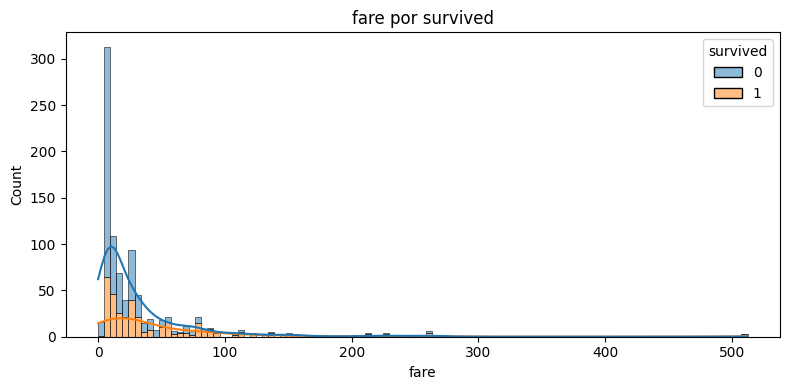

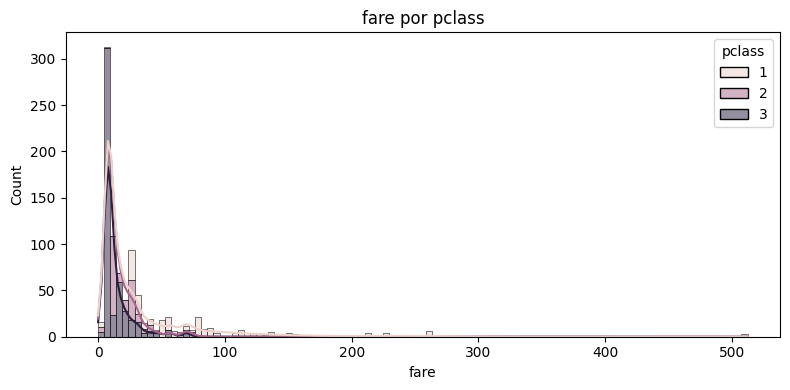

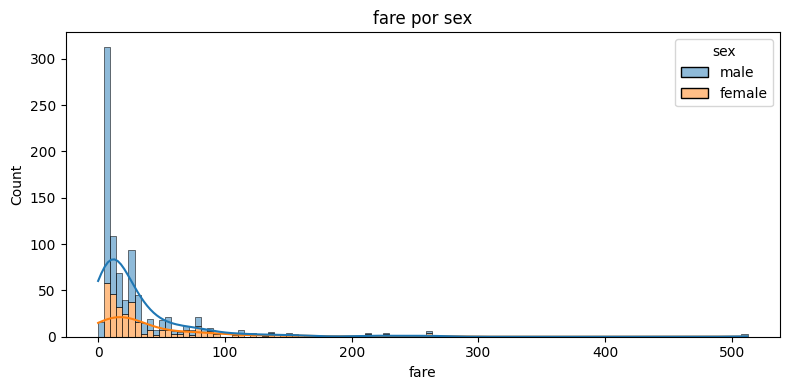

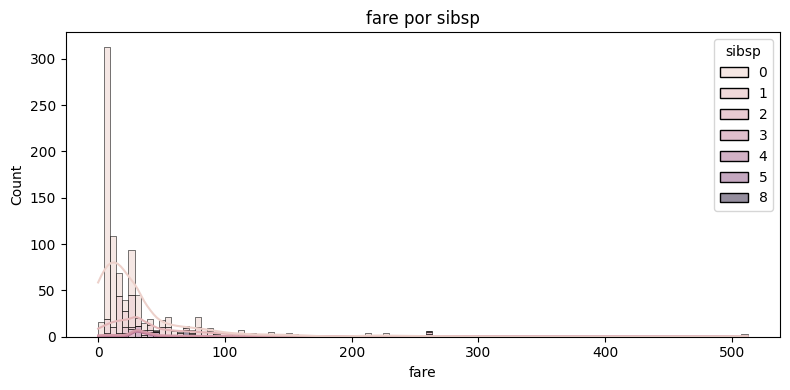

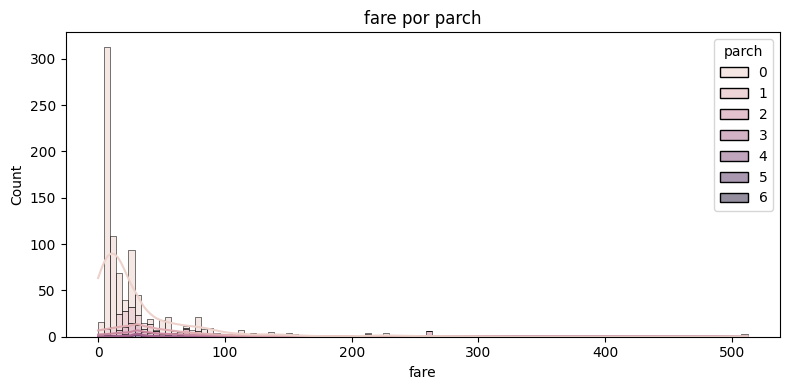

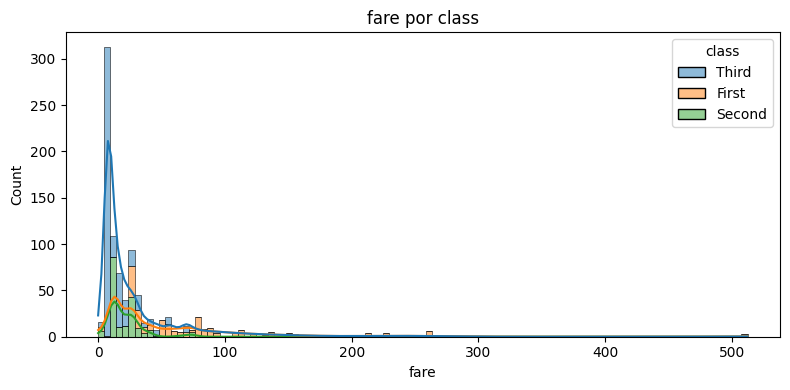

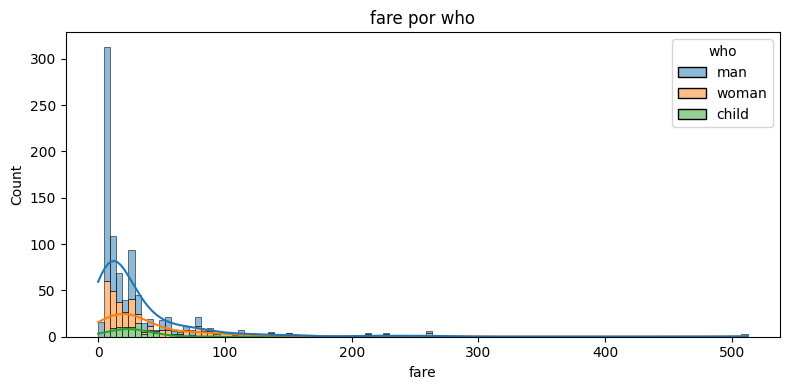

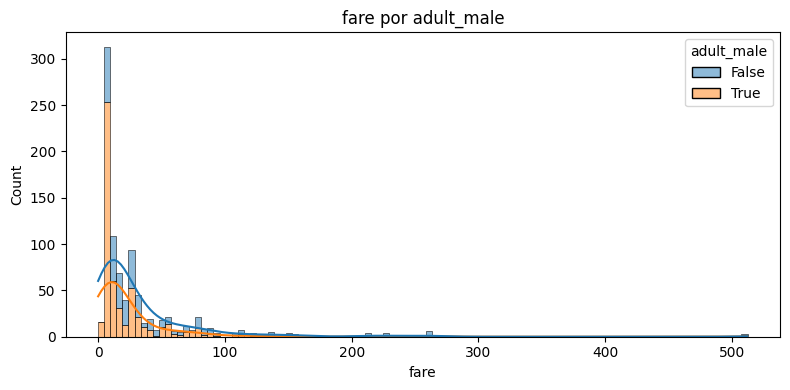

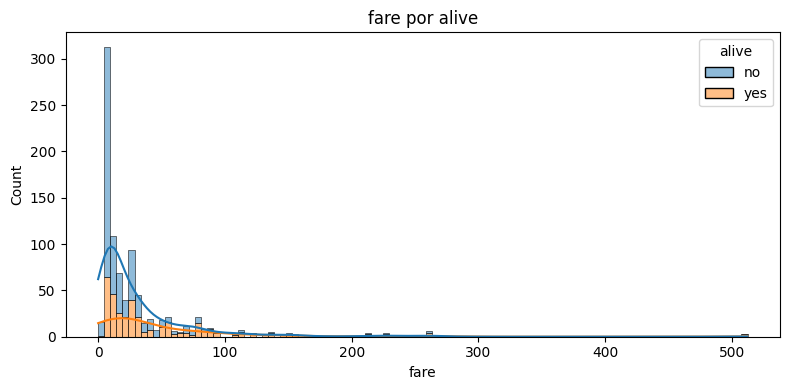

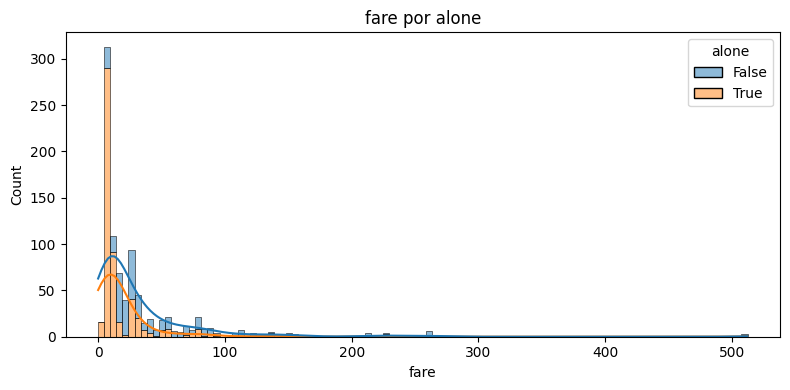

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'class',
 'who',
 'adult_male',
 'alive',
 'alone']

In [26]:
plot_features_cat_regression(df, "fare", with_individual_plot = True)

In [29]:
plot_features_cat_regression(df, "age", with_individual_plot = True)

No se encontraron variables categóricas con relación significativa con el target.


[]